LocalAdsorbedGasDensity: 1-Mugele, 2-Hauer, 3-Osawa/Sahoo, 4-Yaws Antoine 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from math import exp
import numpy as np
import pandas as pd

#The following allow direct FEniCS code into python scripts.

def ln(input):
    return np.log(input)

def Constant(constant):
    return constant

In [3]:
t = 293.15
p = 101325
epsmet = 0

In [4]:
#Option 1 Mugele
def Mugele(t):         
    vap_rhoads20 = Constant(998.19)
    alphae20 = Constant(2.07e-4)
    return vap_rhoads20/(Constant(1) + alphae20*(t-Constant(293.15))) 

#Option 2 Hauer
def Hauer(t):
    vap_rhoads10 = Constant(999.7)
    return vap_rhoads10 * (1-Constant(.0003781) * (t-283.15))

#Option 3 Osawa aka Dubinin
def rhoads_T(t):         
    Tb = Constant(373.2)
    alphae = Constant(7.03e-4)   # Thermal Expansion of Liquefied Gases
    return vap_rhoads/(exp(alphae*(t - Tb)))

#Option 4 #Yaws
def adsrho_YAWS(t):
    vap_tcr = Constant(647.0) #[K]
    YAWS_B = Constant(347.10) #[kg/m3]
    YAWS_C = Constant(.27400)
    YAWS_m = Constant(.28571)
    return YAWS_B * pow(YAWS_C,(-1*pow((1-t/(vap_tcr)),YAWS_m)))

In [5]:
def Psat_YAWS_1999(t): #Ps [mmHg] using the conversion 1 mmHg = 133.322Pa, 
    Psat_D = Constant(29.8605)
    Psat_E = Constant(-3152.2)
    Psat_F = Constant(-7.3037)
    Psat_G = Constant(2.4247e-9)
    Psat_H = Constant(1.8090e-6)
    return 133.322*pow(10,(Psat_D + Psat_E / t + Psat_F*ln(t)/ln(10) + t*Psat_G + Psat_H*pow(t,2) ))  #133.332 Pa to 1 mmHg
    
def Psat_DN(t): #Dubinin - Nikolaev
    vap_pcr = Constant(22060000)     # critical pressure [Pa]
    vap_tcr = Constant(647.13)      # critical temperature [K]
    return vap_pcr*pow((t/vap_tcr),2)

temp_list = np.linspace(273.15, 573.15, 100)
Psat_DN_list = []
Psat_Yaws_list = []

for i in range(0,len(temp_list)):
    temp = temp_list[i]
    Psat_DN_list.append(Psat_DN(temp))
    Psat_Yaws_list.append(Psat_YAWS_1999(temp))

In [9]:
temp_list = np.linspace(273.15, 573.15, 100)
adsrho_Ambrozek_list = []
rhoads_T_list = []
Mugele_list = []
Hauer_list = []

for i in range(0,len(temp_list)):
    temp = temp_list[i]
    adsrho_Ambrozek_list.append(adsrho_YAWS(temp))
    rhoads_T_list.append(rhoads_T(temp))
    Mugele_list.append(Mugele(temp))
    Hauer_list.append(Hauer(temp))


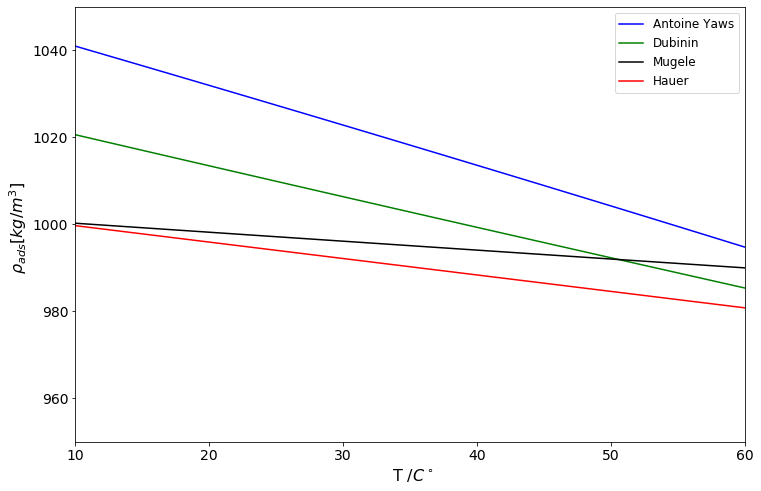

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('')
left, bottom, width, height = [0.2, 0.25, 0.3, 0.3] #Position of inset
#ax2 = fig.add_axes([left, bottom, width, height])



#ax.scatter(temp_list-273.15,adsrho_Ambrozek_list, marker=".", color="blue", s=100)
ax.plot(temp_list-273.15,adsrho_Ambrozek_list, color="blue",label="Antoine Yaws", linestyle='solid')
#ax2.plot(temp_list-273.15,adsrho_Ambrozek_list, color="blue",label="Antoine Yaws", linestyle='solid')

#ax.scatter(temp_list-273.15,rhoads_T_list, marker=".", color="green", s=100)
ax.plot(temp_list-273.15,rhoads_T_list, color="green",label="Dubinin", linestyle='solid') #linestyle='dotted')
#ax2.plot(temp_list-273.15,rhoads_T_list, color="green",label="Dubinin", linestyle='dotted')

#ax.scatter(temp_list-273.15,Mugele_list, marker=".", color="blue", s=100)
ax.plot(temp_list-273.15,Mugele_list, color="black",label="Mugele", linestyle='solid') #linestyle=(0,(5,10)))
#ax2.plot(temp_list-273.15,Mugele_list, color="black",label="Mugele", linestyle=(0,(5,10)))

#ax.scatter(temp_list-273.15,Hauer_list, marker=".", color="blue", s=100)
ax.plot(temp_list-273.15,Hauer_list, color="red",label="Hauer",linestyle='solid') #linestyle=(0,(5,10)))

ax.set_xlabel(r' T /$C^\circ$',fontsize=16)
ax.set_ylabel(r'$\rho_{ads} [kg / m^3]$  ',fontsize=16)
#ax2.plot(temp_list-273.15,Hauer_list, color="red",label="Hauer",linestyle=(0,(5,10)))
ax.set_xlim(10,60) #return to zero after chain 50 computed.
ax.set_ylim(950,1050)
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
ax.plot()
ax.legend(fontsize=12, loc='upper right')   
fig.savefig('rhoads.png')
plt.show()